In [1]:
from rdkit import Chem
from rdkit.Chem import QED
from dgl.model_zoo.chem import load_pretrained
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import os
import math
import numpy as np

In [2]:
def splitsmi(smiles):
    smiles_list = smiles.split('.')
    length = [len(s) for s in smiles_list]
    return smiles_list[np.argmax(length)]
    

In [3]:
chembl_model = load_pretrained('DGMG_ChEMBL_canonical')
chembl_model.eval()


Pretrained model loaded


DGMG(
  (graph_embed): GraphEmbed(
    (node_gating): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
      (1): Sigmoid()
    )
    (node_to_graph): Linear(in_features=128, out_features=256, bias=True)
  )
  (graph_prop): GraphProp(
    (message_funcs): ModuleList(
      (0): Linear(in_features=259, out_features=256, bias=True)
      (1): Linear(in_features=259, out_features=256, bias=True)
    )
    (node_update_funcs): ModuleList(
      (0): GRUCell(256, 128)
      (1): GRUCell(256, 128)
    )
  )
  (add_node_agent): AddNode(
    (add_node): Sequential(
      (0): Linear(in_features=256, out_features=256, bias=True)
      (1): Dropout(p=0.2, inplace=False)
      (2): Linear(in_features=256, out_features=8, bias=True)
    )
    (node_type_embed): Embedding(7, 128)
    (initialize_hv): Linear(in_features=384, out_features=128, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (add_edge_agent): AddEdge(
    (add_edge): Sequential(
      (0): Linear

RDKit ERROR: [21:17:57] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:17:57] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:17:57] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [21:17:57] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [21:17:58] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [21:17:58] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [21:17:59] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:17:59] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [21:18:00] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [21:18:00] Explicit valence for atom # 18 O, 3, is greater than permitted
RDKit ERROR: [21:18:01] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:18:01] Explicit valence for atom 

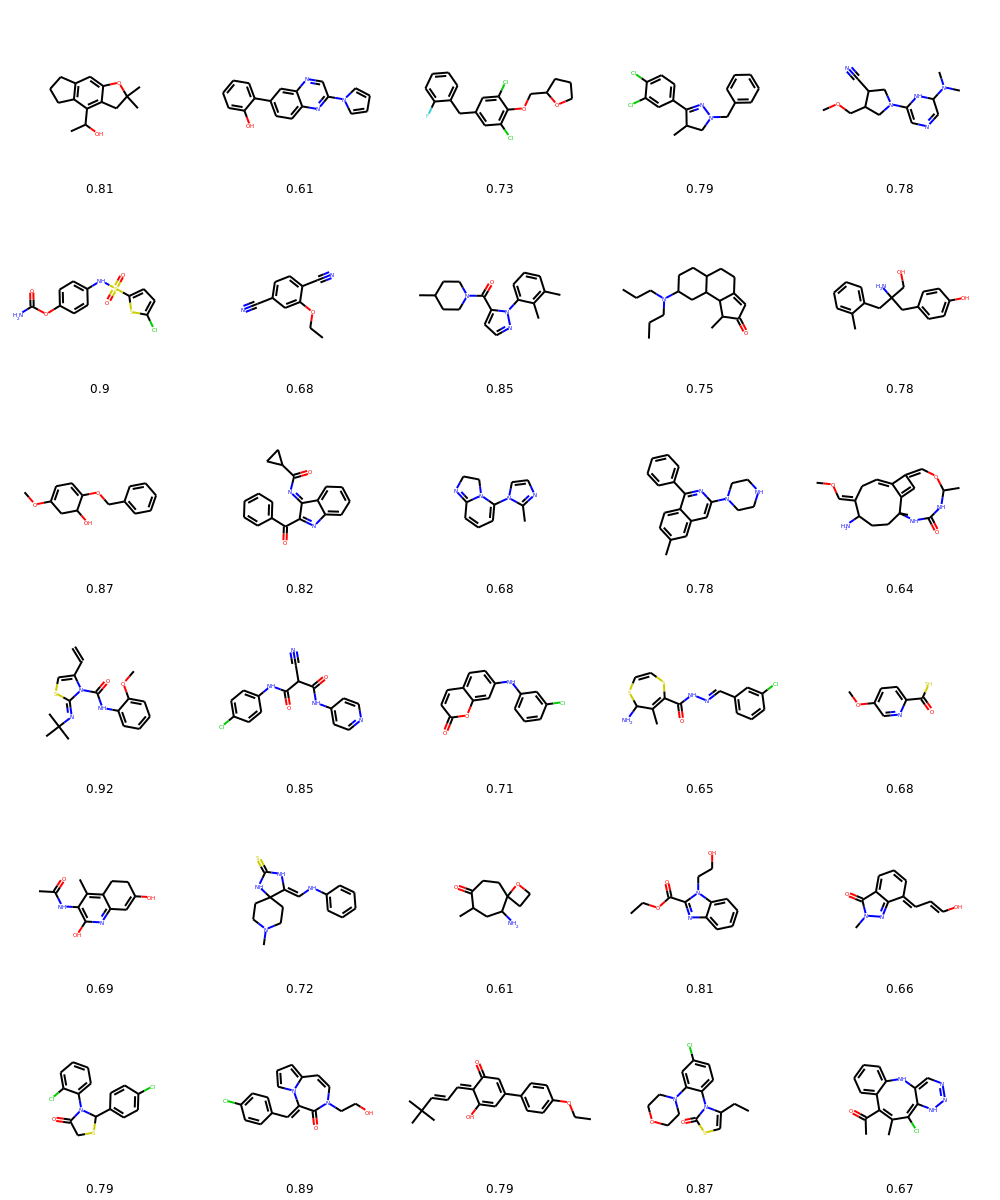

In [4]:
chembl_mols = []
chembl_qeds = []
while len(chembl_mols) < 30:
    s = chembl_model(rdkit_mol=True, max_num_steps=100)
    s = splitsmi(s)
    try:
        mol = Chem.MolFromSmiles(s)
        Chem.SanitizeMol(mol)
        qed = QED.qed(mol)
        if qed > 0.6:
            chembl_mols.append(mol)
            chembl_qeds.append(str(np.round(qed, 2)))
    except:
        pass
Draw.MolsToGridImage(chembl_mols, legends=chembl_qeds, molsPerRow=5)

In [5]:
zinc_model = load_pretrained('DGMG_ZINC_canonical')
zinc_model.eval()


Pretrained model loaded


DGMG(
  (graph_embed): GraphEmbed(
    (node_gating): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
      (1): Sigmoid()
    )
    (node_to_graph): Linear(in_features=128, out_features=256, bias=True)
  )
  (graph_prop): GraphProp(
    (message_funcs): ModuleList(
      (0): Linear(in_features=259, out_features=256, bias=True)
      (1): Linear(in_features=259, out_features=256, bias=True)
    )
    (node_update_funcs): ModuleList(
      (0): GRUCell(256, 128)
      (1): GRUCell(256, 128)
    )
  )
  (add_node_agent): AddNode(
    (add_node): Sequential(
      (0): Linear(in_features=256, out_features=256, bias=True)
      (1): Dropout(p=0.2, inplace=False)
      (2): Linear(in_features=256, out_features=10, bias=True)
    )
    (node_type_embed): Embedding(9, 128)
    (initialize_hv): Linear(in_features=384, out_features=128, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (add_edge_agent): AddEdge(
    (add_edge): Sequential(
      (0): Linea

RDKit ERROR: [21:18:02] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:18:03] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [21:18:04] Explicit valence for atom # 10 C, 6, is greater than permitted
RDKit ERROR: [21:18:04] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:18:04] Explicit valence for atom # 13 Cl, 3, is greater than permitted
RDKit ERROR: [21:18:04] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [21:18:05] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:18:05] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [21:18:05] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [21:18:06] Explicit valence for atom # 2 O, 3, is greater than permitted


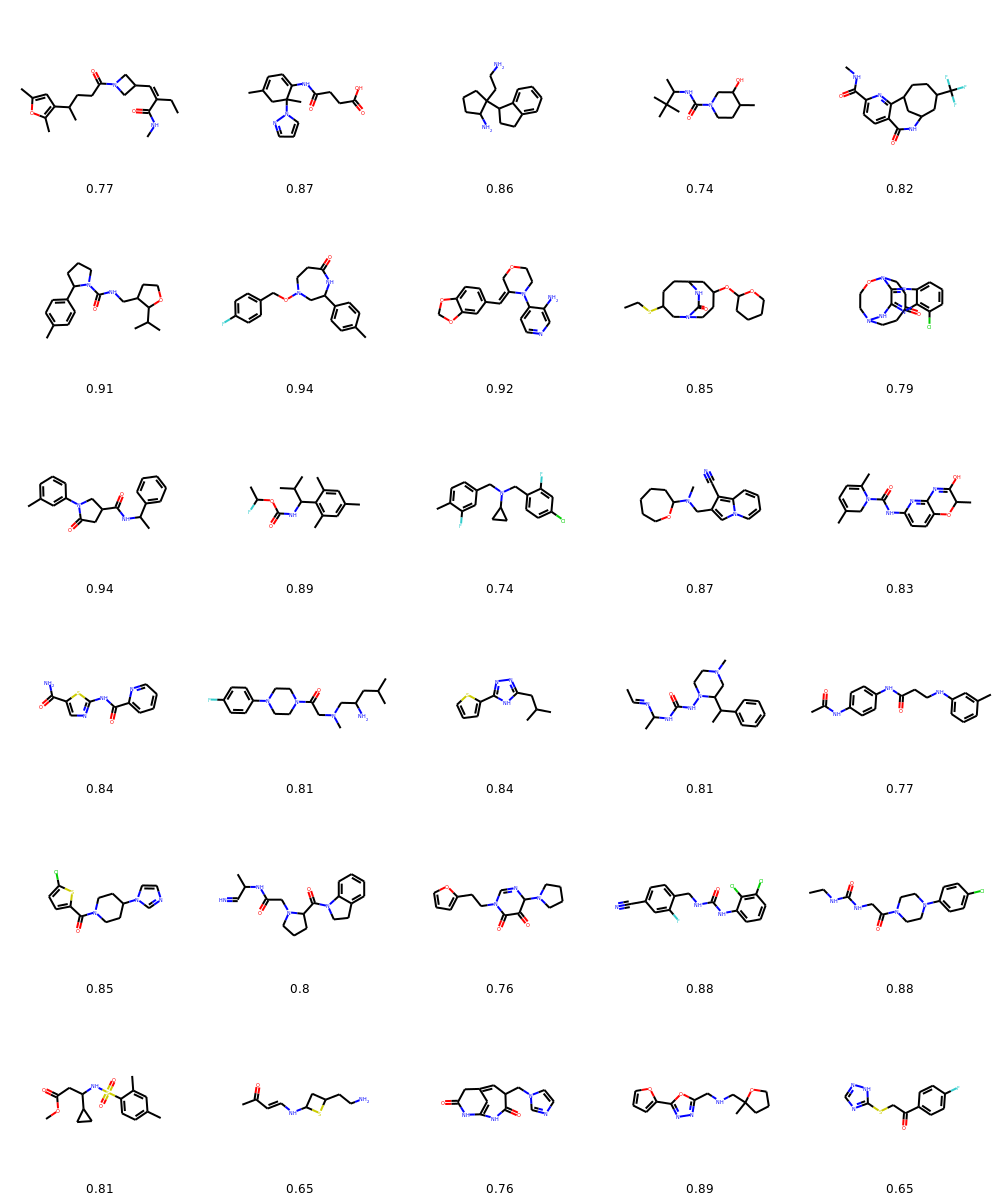

In [6]:
zinc_mols = []
zinc_qeds = []
while len(zinc_mols) < 30:
    s = zinc_model(rdkit_mol=True, max_num_steps=100)
    s = splitsmi(s)
    try:
        mol = Chem.MolFromSmiles(s)
        Chem.SanitizeMol(mol)
        qed = QED.qed(mol)
        if qed > 0.6:
            zinc_mols.append(mol)
            zinc_qeds.append(str(np.round(qed,2)))
    except:
        pass
Draw.MolsToGridImage(zinc_mols, legends=zinc_qeds, molsPerRow=5)